In [31]:
import nltk
from nltk.corpus import treebank
from nltk.corpus import brown
from nltk.corpus import conll2000
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed, Embedding, SimpleRNN, LSTM, GRU

In [2]:
# Download Data 

nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')
nltk.download('universal_tagset')

treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
conll2000_corpus = brown.tagged_sents(tagset='universal')

[nltk_data] Downloading package treebank to /usr/share/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [3]:
# combine different Corpus into single Corpus

tagged_sentences = treebank_corpus + brown_corpus + conll2000_corpus
tagged_sentences

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]

In [4]:
#Extract X and y data from the pooled corpus

X=[]
y=[]
for sentence in tagged_sentences:
    X_sentences =[]
    y_sentences =[]
    for entity in sentence:
        X_sentences.append(entity[0])
        y_sentences.append(entity[1])
    X.append(X_sentences)
    y.append(y_sentences)

In [5]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags = len(set([word.lower() for sentence in y for word in sentence]))

In [6]:
print('Total number of sentences = ', len(X))
print('Vocabalary size = ', num_words)
print('Number of tags available  = ', num_tags)

Total number of sentences =  118594
Vocabalary size =  53232
Number of tags available  =  12


In [7]:
print(X[0])
print(y[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']


In [8]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(y)
y_encoded = word_tokenizer.texts_to_sequences(y)

In [9]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)
X_encoded = word_tokenizer.texts_to_sequences(X)

In [10]:
print(X[0])
print(y[0])
print(X_encoded[0])
print(y_encoded[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']
[5603, 28966, 2, 11383, 104, 151, 2, 54, 1725, 1, 373, 18, 7, 20976, 966, 3415, 4181, 3]
[1, 1, 3, 11, 1, 6, 3, 2, 2, 5, 1, 4, 5, 6, 1, 1, 11, 3]


In [11]:
lengths = [len(seq) for seq in X_encoded]
print('Longest sentence = ', max(lengths))

Longest sentence =  271


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

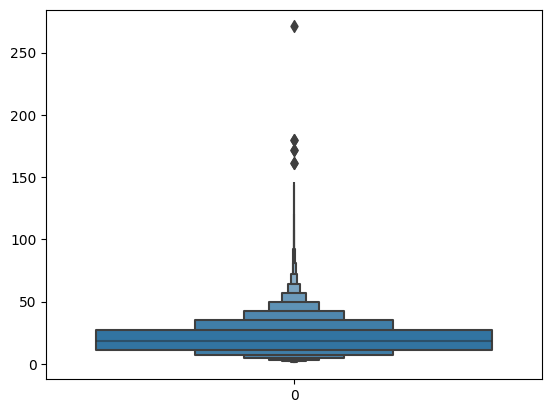

In [12]:
sns.boxenplot(lengths)

In [13]:
MaxSeqCutOff = 100
X_padding = pad_sequences(X_encoded, maxlen=MaxSeqCutOff, padding='pre', truncating='post')
y_padding = pad_sequences(y_encoded, maxlen=MaxSeqCutOff, padding='pre', truncating='post')

In [14]:
print(X_padding[0], '\n'*3)
print(y_padding[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0  5603 28966
     2 11383   104   151     2    54  1725     1   373    18     7 20976
   966  3415  4181     3] 



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  1  3 11  1  6  3  2  2  5  1  4  5  6
  1  1 11  3]


In [15]:
X=X_padding
y=y_padding

In [32]:
path = '/kaggle/input/google-word2vec/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [33]:
embedding_size = 300
vocabulary_size = len(word_tokenizer.word_index) + 1

In [34]:


word_embeddings = np.zeros((vocabulary_size,embedding_size))

word2id = word_tokenizer.word_index

for word, index in word2id.items():
    try:
        word_embeddings[index,:] = word2vec[word]
    except KeyError:
        pass

In [36]:
print(word_embeddings.shape)
word_embeddings[word_tokenizer.word_index['joy']]


(53233, 300)


array([ 0.4453125 , -0.20019531,  0.20019531, -0.03149414,  0.078125  ,
       -0.390625  ,  0.13671875, -0.13867188,  0.05395508,  0.10546875,
       -0.05029297, -0.23730469,  0.19921875,  0.12597656, -0.12695312,
        0.34179688,  0.06347656,  0.26757812, -0.07324219, -0.29101562,
        0.10498047,  0.11914062,  0.23730469,  0.00640869,  0.12451172,
       -0.00939941, -0.02770996,  0.03076172,  0.07421875, -0.22851562,
       -0.08056641, -0.05273438,  0.16894531,  0.19824219, -0.15625   ,
       -0.08740234,  0.10742188, -0.07177734,  0.05200195,  0.25976562,
        0.171875  , -0.13574219,  0.06738281,  0.00531006,  0.15527344,
       -0.03515625,  0.08789062,  0.3359375 , -0.12890625,  0.17578125,
       -0.08642578,  0.32421875, -0.09033203,  0.35351562,  0.24316406,
       -0.07470703, -0.06640625, -0.17578125,  0.06689453, -0.03833008,
        0.0100708 , -0.21484375, -0.03686523,  0.04394531,  0.02209473,
        0.00219727, -0.22460938,  0.03015137, -0.21582031,  0.16

In [19]:
y = to_categorical(y)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=42)

In [21]:
num_class_labels = y.shape[2]

In [22]:

rnn_model_vanilla = Sequential()
rnn_model_vanilla.add(Embedding(input_dim=vocabulary_size,
                               output_dim=embedding_size,
                               trainable=False))
rnn_model_vanilla.add(SimpleRNN(64, return_sequences=True))
rnn_model_vanilla.add(TimeDistributed(Dense(num_class_labels, activation='softmax')))

In [23]:
rnn_model_vanilla.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
rnn_model_vanilla.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 300)       │    15,969,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 100, 64)        │        23,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 100, 13)        │           845 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,042,517 (61.20 MB)

 Trainable params: 24,205 (94.55 KB)

 Non-trainable params: 15,969,900 (60.92 MB)

 Optimizer params: 48,412 (189.11 KB)

In [25]:
rnn_model_vanilla.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
  7/584 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - acc: 0.3770 - loss: 2.4646    

I0000 00:00:1714399153.355619      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


584/584 ━━━━━━━━━━━━━━━━━━━━ 610s 537ms/step - acc: 0.8284 - loss: 0.6709 - val_acc: 0.9153 - val_loss: 0.2758
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9228 - loss: 0.2509 - val_acc: 0.9391 - val_loss: 0.1903
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9418 - loss: 0.1817 - val_acc: 0.9494 - val_loss: 0.1551
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9499 - loss: 0.1522 - val_acc: 0.9549 - val_loss: 0.1371
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9549 - loss: 0.1357 - val_acc: 0.9577 - val_loss: 0.1263
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9574 - loss: 0.1262 - val_acc: 0.9595 - val_loss: 0.1199
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9587 - loss: 0.1211 - val_acc: 0.9605 - val_loss: 0.1160
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9600 - loss: 0.1166 - val_acc: 0.9614 - val_loss: 0.1122
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - a

In [27]:

rnn_model_vanilla = Sequential()
rnn_model_vanilla.add(Embedding(input_dim=vocabulary_size,
                               output_dim=embedding_size,
                               trainable=True))
rnn_model_vanilla.add(SimpleRNN(64, return_sequences=True))
rnn_model_vanilla.add(TimeDistributed(Dense(num_class_labels, activation='softmax')))

In [28]:
rnn_model_vanilla.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [29]:
rnn_model_vanilla.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 190s 179ms/step - acc: 0.9408 - loss: 0.2347 - val_acc: 0.9915 - val_loss: 0.0258
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - acc: 0.9932 - loss: 0.0207 - val_acc: 0.9936 - val_loss: 0.0188
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9953 - loss: 0.0139 - val_acc: 0.9944 - val_loss: 0.0168
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9965 - loss: 0.0104 - val_acc: 0.9948 - val_loss: 0.0161
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9973 - loss: 0.0082 - val_acc: 0.9951 - val_loss: 0.0160
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9980 - loss: 0.0061 - val_acc: 0.9953 - val_loss: 0.0162
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9985 - loss: 0.0047 - val_acc: 0.9954 - val_loss: 0.0169
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9989 - loss: 0.0038 - val_acc: 0.9953 - val_loss: 0.0180
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━

In [38]:
print(vocabulary_size)
print(embedding_size)
print(word_embeddings.shape)

53233
300
(53233, 300)


In [41]:

rnn_model_lstm = Sequential()
#rnn_model_lstm.add()
layer = Embedding(input_dim=vocabulary_size,
                               output_dim=embedding_size,
                               trainable=True)

# rnn_model_vanilla.layers[0].set_weights([word_embeddings])
layer.set_weights(weights=[word_embeddings])
rnn_model_lstm.add(layer)
rnn_model_lstm.add(LSTM(64, return_sequences=True))
rnn_model_lstm.add(TimeDistributed(Dense(num_class_labels, activation='softmax')))

In [23]:
rnn_model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
rnn_model_lstm.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - acc: 0.9200 - loss: 0.2774 - val_acc: 0.9910 - val_loss: 0.0271
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9924 - loss: 0.0225 - val_acc: 0.9932 - val_loss: 0.0196
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9947 - loss: 0.0155 - val_acc: 0.9940 - val_loss: 0.0173
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9956 - loss: 0.0126 - val_acc: 0.9944 - val_loss: 0.0162
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9964 - loss: 0.0104 - val_acc: 0.9948 - val_loss: 0.0157
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9970 - loss: 0.0087 - val_acc: 0.9951 - val_loss: 0.0153
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9976 - loss: 0.0071 - val_acc: 0.9953 - val_loss: 0.0157
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9981 - loss: 0.0057 - val_acc: 0.9953 - val_loss: 0.0160
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 

In [27]:

rnn_model_lstm = Sequential()
rnn_model_lstm.add(Embedding(input_dim=vocabulary_size,
                               output_dim=embedding_size,
                               trainable=True))
                               #weights=word_embeddings))

# rnn_model_vanilla.layers[0].set_weights([word_embeddings])
#rnn_model_vanilla.set_weights([word_embeddings])
rnn_model_lstm.add(GRU(64, return_sequences=True))
rnn_model_lstm.add(TimeDistributed(Dense(num_class_labels, activation='softmax')))

In [28]:
rnn_model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [29]:
rnn_model_lstm.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.9460 - loss: 0.2062 - val_acc: 0.9917 - val_loss: 0.0237
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9930 - loss: 0.0195 - val_acc: 0.9934 - val_loss: 0.0185
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - acc: 0.9948 - loss: 0.0144 - val_acc: 0.9941 - val_loss: 0.0168
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9956 - loss: 0.0121 - val_acc: 0.9946 - val_loss: 0.0159
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - acc: 0.9963 - loss: 0.0102 - val_acc: 0.9949 - val_loss: 0.0154
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9969 - loss: 0.0089 - val_acc: 0.9951 - val_loss: 0.0153
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9974 - loss: 0.0075 - val_acc: 0.9952 - val_loss: 0.0155
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - acc: 0.9979 - loss: 0.0063 - val_acc: 0.9956 - val_loss: 0.0155
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 